In [1]:
import matplotlib.pyplot as plt
import scipy.signal as signal
import numpy as np
import math
from lib.Recording import Recording
from lib.KalmanFilter import KalmanFilter

Loaded data from file that does not contain labels.
Please mute this message by setting mute=True in your algorithm submission


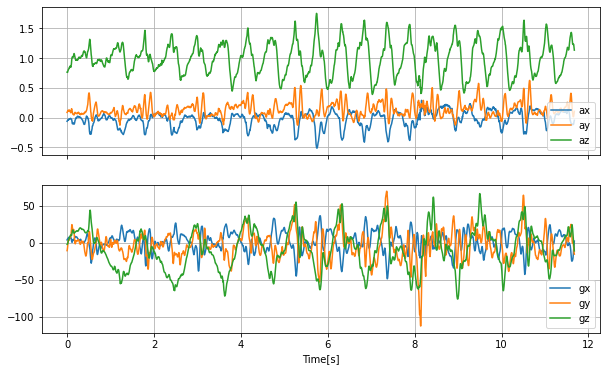

In [51]:
filename = '../recordings/short_walk.json'
trace = Recording(filename, no_labels = True, mute = True)
trace.plot([['ax', 'ay', 'az'], ['gx', 'gy', 'gz']])
# note: sampled every 80ms => frequency of 1/0.08 = 12.5Hz

In [52]:
ax_list = list(zip(trace.data["ax"].timestamps, trace.data["ax"].values))
ay_list = list(zip(trace.data["ay"].timestamps, trace.data["ay"].values))
az_list = list(zip(trace.data["az"].timestamps, trace.data["az"].values))

In [53]:
# veeeeeeery rough walk detection algorithm, mostly based on empirical observations... 
# Just take ay, subtract 1 and calculate the resulting signal's energy over 1 second windows
# will absolutely break in some way, don't judge me when it does
energy_by_interval = [0.0]
window_start_time = ax_list[0][0]
window_length = 1
for i in range(len(ax_list)):
    #_, ax = ax_list[i]
    time, ay = ay_list[i]
    #_, az = az_list[i]
    ay -= 1
    power = ay*ay
    if time-window_length > window_start_time:
        energy_by_interval.append(power)
        window_start_time = time
    else:
        energy_by_interval[-1] += power
print(energy_by_interval)

[164.20325350027107, 158.53472542256986, 160.04408902801362, 160.51530090385475, 154.27752568398358, 153.89161782070659, 151.16614821129508, 145.9692282409524, 153.99808723794004, 149.9777831250638, 140.07334003112908, 94.36498013079255]


In [54]:
#signal.find_peaks(trace.data["ay"].values)
x_axis = np.array(trace.data["ax"].timestamps)
magnitude_x = np.array(trace.data["ax"].values)
magnitude_y = np.array(trace.data["ay"].values)
magnitude_z = np.array(trace.data["az"].values)
magnitude = np.sqrt(magnitude_x**2 + magnitude_y**2 + magnitude_z**2)
print(magnitude)
print(math.sqrt(trace.data["ax"].values[0]**2 + trace.data["ay"].values[0]**2 + trace.data["az"].values[0]**2))
avg_magnitude = np.mean(magnitude)
net_magnitude = magnitude - avg_magnitude
print(net_magnitude)

[0.77080736 0.7691286  0.76742469 ... 1.19850431 1.16534029 1.13858524]
0.7708073559220504
[-0.25099982 -0.25267857 -0.25438249 ...  0.17669714  0.14353312
  0.11677807]


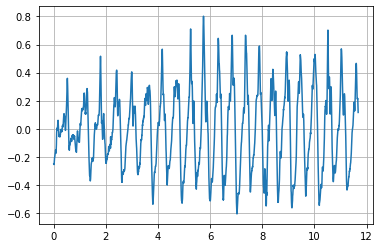

In [55]:
fig, ax = plt.subplots()
#ax.plot(x_axis[0:int(len(x_axis)/5)], net_magnitude[0:int(len(x_axis)/5)])
ax.plot(x_axis, net_magnitude)
ax.grid()
plt.show()

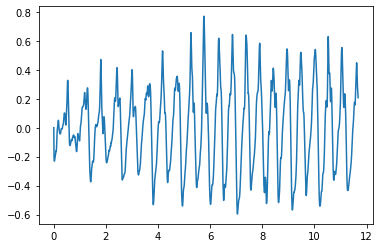

In [56]:
## Kalman Filter, very optional..
#dt = 1.0/60
#F = np.array([[1, dt, 0], [0, 1, dt], [0, 0, 1]])
#H = np.array([1, 0, 0]).reshape(1, 3)
#Q = np.array([[0.05, 0.05, 0.0], [0.05, 0.05, 0.0], [0.0, 0.0, 0.0]])
#R = np.array([0.5]).reshape(1, 1)
#
#kf = KalmanFilter(F = F, H = H, Q = Q, R = R)
#predictions = []
#
#for z in net_magnitude:
#    predictions.append(np.dot(H,  kf.predict())[0])
#    kf.update(z)
#
##plt.plot(x_axis[0:int(len(x_axis)/5)], predictions[0:int(len(x_axis)/5)])
#plt.plot(x_axis, predictions)
#plt.show()

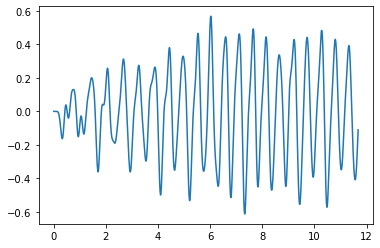

In [58]:
# low pass filter. I have no idea why these parameters work
b, a = signal.butter(12, 6, fs=250)
y = signal.lfilter(b, a, net_magnitude)
plt.plot(x_axis, y)
plt.show()